# Data Pre-processing

###  Dataset: https://www.kaggle.com/c/dog-breed-identification/data?select=labels.csv

### Rescaling the dataset to 80,80 grayscale Images

In [ ]:
https://www.kaggle.com/c/dog-breed-identification/data?select=labels.csv

In [18]:
from PIL import Image
import os, sys
import random
import numpy as np
from numpy import asarray
from numpy import savez_compressed
from numpy import load
import pandas as pd

In [19]:


path = "./train"
dirs = os.listdir( path )

def resize():
    for item in dirs:
        item_path = os.path.join(path, item)
        if os.path.isfile(item_path):
            im = Image.open(item_path).convert('L')
            f, e = os.path.splitext(item_path)            
            imResize = im.resize((80,80), Image.ANTIALIAS)
            imResize.save(f + '.jpg', 'JPEG', quality=100)

resize()

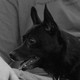

In [20]:
Image.open('./train/a00af55eaca223de36018867b5cf729f.jpg')

### Save Numpy array as npz

In [21]:
# save numpy array as npz file

path = "./train"
dirs = os.listdir( path )
arr = []

for item in dirs:
    item_path = os.path.join(path, item)
    if os.path.isfile(item_path):
        im = Image.open(item_path)
        x= np.array(im)
        arr.append(x)                

# save to npz file
savez_compressed('./index-original.npz', data = np.array(arr))

In [13]:
np.array(arr).shape

(9222, 80, 80)

In [23]:

# load numpy array from npz file
from numpy import load
# load dict of arrays
data = load('./index-original.npz')


In [24]:
data['data'].shape

(9222, 80, 80)

In [40]:

# load numpy array from npz file

# load dict of arrays
dict_data = load('./index-original.npz')
# extract the first array
data = dict_data['data']
# print the array
print(data[0].shape)

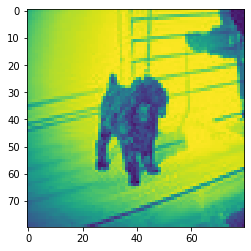

In [27]:
from matplotlib import pyplot as plt
plt.imshow(data[0], interpolation='nearest')
plt.show()

### Generate Labels from CSV and save it as npy file

In [34]:

labels = pd.read_csv('./labels.csv')

classes  = labels['breed'].unique()
classes_dict = {}
for i in range(len(classes)):
    classes_dict[classes[i]] = i

In [35]:
classes_dict

{'boston_bull': 0,
 'dingo': 1,
 'pekinese': 2,
 'bluetick': 3,
 'golden_retriever': 4,
 'bedlington_terrier': 5,
 'borzoi': 6,
 'basenji': 7,
 'scottish_deerhound': 8,
 'shetland_sheepdog': 9,
 'walker_hound': 10,
 'maltese_dog': 11,
 'norfolk_terrier': 12,
 'african_hunting_dog': 13,
 'wire-haired_fox_terrier': 14,
 'redbone': 15,
 'lakeland_terrier': 16,
 'boxer': 17,
 'doberman': 18,
 'otterhound': 19,
 'standard_schnauzer': 20,
 'irish_water_spaniel': 21,
 'black-and-tan_coonhound': 22,
 'cairn': 23,
 'affenpinscher': 24,
 'labrador_retriever': 25,
 'ibizan_hound': 26,
 'english_setter': 27,
 'weimaraner': 28,
 'giant_schnauzer': 29,
 'groenendael': 30,
 'dhole': 31,
 'toy_poodle': 32,
 'border_terrier': 33,
 'tibetan_terrier': 34,
 'norwegian_elkhound': 35,
 'shih-tzu': 36,
 'irish_terrier': 37,
 'kuvasz': 38,
 'german_shepherd': 39,
 'greater_swiss_mountain_dog': 40,
 'basset': 41,
 'australian_terrier': 42,
 'schipperke': 43,
 'rhodesian_ridgeback': 44,
 'irish_setter': 45,
 'a

In [36]:
# see the images in train folder and then see it from csv, see its class and save the list as np array on disk with 
# its name

path = "./train"
dirs = os.listdir( path )
arr = []

labels = pd.read_csv('./labels.csv')
for item in dirs:
    item_path = os.path.join(path, item)
    if os.path.isfile(item_path):
        item = item.split('.jpg')[0]        
        x = labels[labels['id'] == item]['breed']
        x= x.values[0]
        arr.append(classes_dict[x])        

        
# define data
# save to npy file
savez_compressed('./train-labels.npz', data = np.array(arr))

In [38]:
dict_data = load('./query-labels.npz')
# extract the first array
data = dict_data['data']

In [39]:
data[0]

97